# 01. Знакомство с `torch.Tensor`

V 0.1 04.02.2021

---

При решении данных задач не подразумевается использования циклов или генераторов Python, если в задании не сказано обратного. Решение должно опираться на использование функционала библиотеки `torch`.

[PyTorch documentation](https://pytorch.org/docs/stable/#pytorch-documentation)

In [2]:
!pip install torch

     -------------------------------------- 172.4/172.4 MB 2.1 MB/s eta 0:00:00


In [1]:
import torch

## 1.1 Создание тензоров и выполнение базовых операций над ними

[Документация по функциям для создания тензоров](https://pytorch.org/docs/stable/torch.html#creation-ops)

[Документация по функциям для работы с индексами](https://pytorch.org/docs/stable/torch.html#indexing-slicing-joining-mutating-ops)

1.1.1 Создайте двумерный тензор размера (8, 8). Используя как можно меньше операций, добейтесь расстановки кодов "шахматных фигур".

Ожидаемый результат:

```
[[-4., -3., -2., -6., -5., -2., -3., -4.],
 [-1., -1., -1., -1., -1., -1., -1., -1.],
 [0., 0., 0., 0., 0., 0., 0., 0.],
 [0., 0., 0., 0., 0., 0., 0., 0.],
 [0., 0., 0., 0., 0., 0., 0., 0.],
 [0., 0., 0., 0., 0., 0., 0., 0.],
 [1., 1., 1., 1., 1., 1., 1., 1.],
 [4., 3., 2., 6., 5., 2., 3., 4.]]

```

In [16]:
chessboard = torch.tensor([
    [-4., -3., -2., -6., -5., -2., -3., -4.],
    [-1., -1., -1., -1., -1., -1., -1., -1.],
    [0., 0., 0., 0., 0., 0., 0., 0.],
    [0., 0., 0., 0., 0., 0., 0., 0.],
    [0., 0., 0., 0., 0., 0., 0., 0.],
    [0., 0., 0., 0., 0., 0., 0., 0.],
    [1., 1., 1., 1., 1., 1., 1., 1.],
    [4., 3., 2., 6., 5., 2., 3., 4.]
], dtype=torch.float32)

chessboard

tensor([[-4., -3., -2., -6., -5., -2., -3., -4.],
        [-1., -1., -1., -1., -1., -1., -1., -1.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
        [ 4.,  3.,  2.,  6.,  5.,  2.,  3.,  4.]])

1.1.2 Средствами `torch` рассчитать произведения четных чисел от 2 до 20 на ближайшие к ним бОльшие нечетные числа.

In [18]:
even_numbers = torch.arange(2, 21, 2)
odd_numbers = even_numbers + 1
proizv = even_numbers * odd_numbers
proizv

tensor([  6,  20,  42,  72, 110, 156, 210, 272, 342, 420])

1.1.3 Создать тензор размера 11x7 вида: [[1, 2, 3, ..., 7], [11, 12, 13, ..., 17], [21, 22, 23, ..., 27], ..., [101, 102, 103, ..., 107]]

In [14]:
a = torch.arange(1,111)
a = a.reshape((11, -1))
a[:,:7]


tensor([[  1,   2,   3,   4,   5,   6,   7],
        [ 11,  12,  13,  14,  15,  16,  17],
        [ 21,  22,  23,  24,  25,  26,  27],
        [ 31,  32,  33,  34,  35,  36,  37],
        [ 41,  42,  43,  44,  45,  46,  47],
        [ 51,  52,  53,  54,  55,  56,  57],
        [ 61,  62,  63,  64,  65,  66,  67],
        [ 71,  72,  73,  74,  75,  76,  77],
        [ 81,  82,  83,  84,  85,  86,  87],
        [ 91,  92,  93,  94,  95,  96,  97],
        [101, 102, 103, 104, 105, 106, 107]])

1.1.4 Написать функцию, которая для целых значений `n` и `m` будет возвращать тензор размера `n`x`m`, заполненный текстурой размера 2x2, состоящей из следующих значений:

```
0 1

2 3

```

Пример для n = 4 и m = 5:

```
0 1 0 1 0

2 3 2 3 2

0 1 0 1 0

2 3 2 3 2
```

In [30]:
def create_texture_tensor(n, m):
    texture = torch.tensor([[0, 1], [2, 3]], dtype=torch.int)
    texture_tensor = texture.repeat((n + 1) // 2, (m + 1) // 2)
    texture_tensor = texture_tensor[:n, :m]

    return texture_tensor

n = 4
m = 5
texture_tensor = create_texture_tensor(n, m)
print(texture_tensor)



tensor([[0, 1, 0, 1, 0],
        [2, 3, 2, 3, 2],
        [0, 1, 0, 1, 0],
        [2, 3, 2, 3, 2]], dtype=torch.int32)


1.1.5 Сгенерировать двумерный тензор `t` размерности (4, 7), состоящий из случайных действительных чисел, равномерно распределенных в дипазоне от 0 до 20. Нормализовать значения массива с помощью преобразования вида $ax+b$ так, что после нормализации максимальный элемент масива будет равен 1.0, минимальный 0.0

[Random Sampling](https://pytorch.org/docs/stable/torch.html#random-sampling)

[Distributions](https://pytorch.org/docs/stable/distributions.html)

1.1.6 Задать два двумерных тензора `ar1` и `ar2` размерности (4, 7), состоящих из случайных целых чисел в пределах от 0 до 10. Построить двумерный тензор размерности (4, 7), каждый элемент которого представляет собой максимум из двух значений, находящихся на аналогичной позиции в массивах `ar1`, `ar2`.

[Reductions ops](https://pytorch.org/docs/stable/torch.html#reduction-ops)

1.1.7 Создать тензор из 20 случайных целых чисел от 0 до 100. Получить второе сверху значение в тензоре. Определить индекс этого значения.

## 1.2 Распространение

[Numpy broadcasting](https://numpy.org/devdocs/user/theory.broadcasting.html)

[Torch broadcasting](https://pytorch.org/docs/stable/notes/broadcasting.html)

1.2.1 Создать тензор 11x7 вида: `[[1, 2, 3, ..., 7], [11, 12, 13, ..., 17], [21, 22, 23, ..., 27], ..., [101, 102, 103, ..., 107]]`. При решении задачи применить технику распространения.

In [29]:
row_tensor = torch.arange(1, 108, 10)
column_tensor = torch.arange(0, 7).view(1, -1)
result_tensor = row_tensor.view(-1, 1) + column_tensor

print(result_tensor)


tensor([[  1,   2,   3,   4,   5,   6,   7],
        [ 11,  12,  13,  14,  15,  16,  17],
        [ 21,  22,  23,  24,  25,  26,  27],
        [ 31,  32,  33,  34,  35,  36,  37],
        [ 41,  42,  43,  44,  45,  46,  47],
        [ 51,  52,  53,  54,  55,  56,  57],
        [ 61,  62,  63,  64,  65,  66,  67],
        [ 71,  72,  73,  74,  75,  76,  77],
        [ 81,  82,  83,  84,  85,  86,  87],
        [ 91,  92,  93,  94,  95,  96,  97],
        [101, 102, 103, 104, 105, 106, 107]])


1.2.2 Вычесть одномерный тензор `b_1d` из двухмерного тензора `a_2d`, так, чтобы каждый элемент одномерного тензора вычитался из всех элементов соответствующих строк двумерного тензора.

_Пример:_

Для входа:
```python
a_2d = np.array([[3,3,3],[4,4,4],[5,5,5]])
b_1d = np.array([1,2,3])
```

Ожидается резульат:

```python
[[2 2 2]
 [2 2 2]
 [2 2 2]]
```

## 1.3 Индексы, маскирование и прихотливое индексирование

[Документация по функциям для работы с индексами](https://pytorch.org/docs/stable/torch.html#indexing-slicing-joining-mutating-ops)

1.3.1 Получить индексы, для которых элементы тензоров `a` и `b` совпадают.

_Пример:_

Для входа:
```python
a = np.array([1,2,3,2,3,4,3,4,5,6])
b = np.array([7,2,10,2,7,4,9,4,9,8])
```

Ожидается резульат:

```python
array([1, 3, 5, 7])
```

1.3.2 Инвертировать порядок элементов в двумерном тензоре `torch.arange(9).view(3,3)`.

Ожидаемый результат:


```python
array([[8, 7, 6],
       [5, 4, 3],
       [2, 1, 0]])
```

In [27]:
tens = torch.arange(9).reshape((3,3))
tens_tmp = torch.tensor([8]).repeat(9).reshape(3,3)
tens_tmp-tens

tensor([[8, 7, 6],
        [5, 4, 3],
        [2, 1, 0]])

1.3.3 Из входного тензора a получить только элементы, находящиеся в диапазоне от 5 до 10.

_Пример:_

Для входа:
```python
a = np.array([2, 6, 1, 9, 10, 3, 27])
```

Ожидается резульат:

```python
array([6, 9, 10])
```

1.3.4 Поменять местами столбец 1 и 2 тензора `np.arange(9).reshape(3,3)`

1.3.5 Создать тензор 8 на 10 из случайных целых чисел из диапазона от 0 до 10 и найти в ней строку (ее индекс и вывести саму строку), в которой сумма значений минимальна.

1.3.6 Cоздать тензор из 20 случайных целых чисел от 0 до 100. Обрезать значения тензора (заменить значения, выходящие за диапазон, на крайние значения) снизу по значению 30, сверху по значению 70.

1.3.7 Создать два тензора размера 30 на 3 из случайных целых чисел из диапазона от 0 до 10 и найти все значения первого тензора, которые больше соответсвующих (по расположению) значений второго тензора. Подсчитать сумму этих значений.

In [13]:
tens1 = torch.randint(0, 11, (30, 3))
tens2 = torch.randint(0, 11, (30, 3))
print("Первая исходная матрица: ", tens1)
print("Вторая исходная матрица: ", tens2)
print()
f"Сумма значений: {tens1[tens1>tens2].sum().item()}"

Первая исходная матрица:  tensor([[10,  3,  7],
        [ 8,  3,  1],
        [ 7, 10,  8],
        [10,  9,  0],
        [ 5,  7,  5],
        [ 8,  5,  0],
        [ 9, 10,  0],
        [ 9,  2, 10],
        [ 4,  4,  6],
        [ 3,  0,  6],
        [ 6,  4, 10],
        [10,  1,  3],
        [ 0,  2,  8],
        [10,  2,  0],
        [ 1,  7, 10],
        [ 9,  3,  5],
        [ 2,  7,  1],
        [ 9,  5,  8],
        [ 9, 10,  0],
        [ 5,  8,  9],
        [ 0,  4,  9],
        [ 6,  9,  1],
        [10,  8,  1],
        [ 9,  2,  4],
        [ 8,  8,  8],
        [ 6,  6,  7],
        [ 1,  0,  8],
        [ 3,  9,  0],
        [ 5,  8,  4],
        [ 5,  0,  7]])
Вторая исходная матрица:  tensor([[ 2,  4,  2],
        [ 4,  5, 10],
        [ 7,  0,  4],
        [ 8,  5,  6],
        [ 5,  4,  8],
        [10,  3,  6],
        [ 5,  5,  5],
        [ 4,  5,  2],
        [ 6,  2,  8],
        [ 7,  9,  3],
        [ 9, 10,  8],
        [ 8,  1, 10],
        [ 5,  8,  6],
 

'Сумма значений: 321'

1.3.8 При помощи прихотливого индексирования для двухмерного массива размерности (20, 20), состоящего из случайных целых чисел в пределах от 0 до 10 получить массив элементов находящихся на диагонали, проходящей над основной диагональю.

1.3.9 Задать два двухмерных тензора `ar1` и `ar2` размерности (5, 10), состоящих из случайных целых чисел в пределах от 0 до 10. Удвоить все значения `ar1`, которые совпадают со значениями `ar2`, расположенными на аналогичных позициях.

In [5]:
ar1 = torch.randint(0, 11, (5, 10))
ar2 = torch.randint(0, 11, (5, 10))
print("Первая исходная матрица: ", ar1)
print("Вторая исходная матрица: ", ar2)
ar1[ar1 == ar2] *= 2
print("Результирующая матрица: ", ar1)


Первая исходная матрица:  tensor([[ 5,  7,  6, 10,  2,  9,  9,  3,  9,  3],
        [ 2,  2, 10,  9,  9,  3,  7,  9, 10,  6],
        [ 8,  0,  2,  4,  6,  4,  3,  2,  2,  4],
        [ 3,  4,  4,  1,  9,  1,  4,  3, 10,  8],
        [ 8, 10,  2,  9,  8,  7,  7,  8,  3,  2]])
Вторая исходная матрица:  tensor([[ 6,  0,  4,  4,  0, 10,  2,  0,  4,  5],
        [ 8, 10,  3,  6,  5,  7,  5,  7, 10, 10],
        [ 8,  7,  8,  2, 10, 10,  5,  6,  0,  8],
        [ 9,  7,  3, 10,  4,  4,  2,  9,  6,  7],
        [ 6,  7,  9,  1,  0,  4,  6,  4,  0,  9]])
Результирующая матрица:  tensor([[ 5,  7,  6, 10,  2,  9,  9,  3,  9,  3],
        [ 2,  2, 10,  9,  9,  3,  7,  9, 20,  6],
        [16,  0,  2,  4,  6,  4,  3,  2,  2,  4],
        [ 3,  4,  4,  1,  9,  1,  4,  3, 10,  8],
        [ 8, 10,  2,  9,  8,  7,  7,  8,  3,  2]])


1.3.10 Заданы три двухмерных тензора `ar1`, `ar2` и `ar3` размерности (4, 7), состоящие из случайных целых чисел в пределах от 0 до 10. Обнулить все элементы `ar1`, которые больше соответствующих (находящихся в соответствующих позициях) элементов `ar2` и меньше соответствующих элементов `ar3`.

1.3.11 Задан двумерный тензор `ar1` размерности (20, 5), состоящий из случайных целых чисел в пределах от 0 до 20. Определить, в каких столбцах не менее 5 раз встречается значение, максимальное по своей строке.

1.3.12 Задан двумерный тензор `ar1` размерности (4, 7), состоящий из случайных  чисел в пределах от 0 до 1. Обнулить все значения в массиве, расположенные строго правее и ниже максимального элемента массива. 

1.3.13 Построить "one-hot encoding" для одномерного тензора, содержащего целые числа (длина вектора заранее неизвестна, набор значений заранее неизвестен, при этом в итоговой матрице должны присутствовать столбцы для всех натуральных чисел вплоть до максимального встречающегося в исходном массиве).

Пример:

для тензора `torch.tensor([2, 3, 2, 2, 2, 1])`.

Ожидается результат:

```python
tensor([[0., 1., 0.],
        [0., 0., 1.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [1., 0., 0.]])
```

In [45]:
import torch

def one_hot_encode(tensor):
    max_value = torch.max(tensor)
    one_hot_matrix = torch.zeros((len(tensor), max_value + 1), dtype=torch.float)
    one_hot_matrix.scatter_(1, tensor.unsqueeze(1), 1)
    
    return one_hot_matrix

input_tensor = torch.tensor([2, 3, 2, 15, 2, 1])
one_hot_encoded = one_hot_encode(input_tensor)
print(one_hot_encoded)




tensor([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])


1.3.14 Создать тензор `arr` из 20 случайных целых чисел от 0 до 100. Найти самое частое значение в тензоре. 
Найти индексы в тензоре, соответствующие самому частому значению. Проверить, как работет алгоритм при двух значениях, имеющих наибольшую встречаемость, предложить приемлемое поведение алгоритма для этого случая. 

## 1.4 Математические задачи

1.4.1 Приблизительно (с погрешностью порядка 1%) рассчитать на какой части интервала от 0 до 10 значение функции x * sin(x) больше 0.5.

In [43]:
def func(x):
    return x * torch.sin(x)

target_value = 0.5
x = torch.linspace(0,10,int(10/0.01))
y = func(x)
x[y>0.5]

tensor([0.7508, 0.7608, 0.7708, 0.7808, 0.7908, 0.8008, 0.8108, 0.8208, 0.8308,
        0.8408, 0.8509, 0.8609, 0.8709, 0.8809, 0.8909, 0.9009, 0.9109, 0.9209,
        0.9309, 0.9409, 0.9510, 0.9610, 0.9710, 0.9810, 0.9910, 1.0010, 1.0110,
        1.0210, 1.0310, 1.0410, 1.0511, 1.0611, 1.0711, 1.0811, 1.0911, 1.1011,
        1.1111, 1.1211, 1.1311, 1.1411, 1.1512, 1.1612, 1.1712, 1.1812, 1.1912,
        1.2012, 1.2112, 1.2212, 1.2312, 1.2412, 1.2513, 1.2613, 1.2713, 1.2813,
        1.2913, 1.3013, 1.3113, 1.3213, 1.3313, 1.3413, 1.3514, 1.3614, 1.3714,
        1.3814, 1.3914, 1.4014, 1.4114, 1.4214, 1.4314, 1.4414, 1.4515, 1.4615,
        1.4715, 1.4815, 1.4915, 1.5015, 1.5115, 1.5215, 1.5315, 1.5415, 1.5516,
        1.5616, 1.5716, 1.5816, 1.5916, 1.6016, 1.6116, 1.6216, 1.6316, 1.6416,
        1.6517, 1.6617, 1.6717, 1.6817, 1.6917, 1.7017, 1.7117, 1.7217, 1.7317,
        1.7417, 1.7518, 1.7618, 1.7718, 1.7818, 1.7918, 1.8018, 1.8118, 1.8218,
        1.8318, 1.8418, 1.8519, 1.8619, 

1.4.2 Найти все простые числа в пределах ста. (Для решения предлагается использовать Решето Эратосфена) Использовать не более 1 цикла (желательно).

1.4.3 Найти евклидово расстояние между двумя одномерными тензорами одинаковой размерности, не используя готовые решения из библиотек.

In [20]:
def euclidean_distance(tensor1, tensor2):
    squared_diff = (tensor1 - tensor2)**2
    sum_squared_diff = squared_diff.sum()
    return sum_squared_diff.sqrt()


tensor1 = torch.tensor(np.random.rand(5))
tensor2 = torch.tensor(np.random.rand(5))
print('Первый тензор: ', tensor1)
print('Второй тензор: ', tensor2)
distance = euclidean_distance(tensor1, tensor2)
print("Евклидово расстояние: ",float(distance))


Первый тензор:  tensor([0.2229, 0.8167, 0.7385, 0.1057, 0.1914], dtype=torch.float64)
Второй тензор:  tensor([0.0478, 0.2877, 0.5001, 0.3833, 0.4362], dtype=torch.float64)
Евклидово расстояние:  0.710190997812107


1.4.4 Создать двумерный тензор 20 на 3, содержащий случайные целые числа от 0 до 100. 
Интерпретируя тензор как 20 векторов из 3х компонент, отсортировать его по длине векторов.

1.4.5 Найти "локальные максимумы" в одномерном тензоре (т.е. значения, большие предыдущего и последующего) `torch.tensor([1, 3, 7, 1, 2, 6, 0, 1])` и вывести их индексы.

1.4.6 Задан произвольный массив numpy (например массив из 100 случайных числе от 0 до 1). Необходимо найти в нем число наиболее близкое к заданному.

In [42]:
import numpy as np

numpy_array = np.random.rand(100)
target_number = 0.5 
tensor_array = torch.tensor(numpy_array)

absolute_difference = torch.abs(tensor_array - target_number)
closest_index = torch.argmin(absolute_difference)
closest_number = tensor_array[closest_index]

print("Исходный массив:")
print(numpy_array)
print("Заданное число:", target_number)
print("Число, наиболее близкое к заданному:", closest_number.item())

Исходный массив:
[0.16723374 0.78945765 0.78229024 0.18285111 0.09999805 0.10762345
 0.52416563 0.53553556 0.68334111 0.49865879 0.77073597 0.32681888
 0.59777    0.27416925 0.33386651 0.74069789 0.41906659 0.90908989
 0.52725197 0.27429307 0.18778862 0.58806498 0.19698019 0.78402686
 0.61486119 0.5670033  0.35400313 0.86639971 0.5615731  0.41574888
 0.67919216 0.51027356 0.60769895 0.7765009  0.93245014 0.97950132
 0.96248501 0.23675668 0.17785917 0.48411339 0.68922908 0.01695966
 0.39697323 0.85290844 0.87734059 0.29039027 0.92990617 0.46013084
 0.21892036 0.82921397 0.65596428 0.26404334 0.92851916 0.81233376
 0.19320987 0.59479597 0.92169989 0.79581621 0.53515295 0.21915197
 0.26256199 0.66478584 0.88456463 0.0440596  0.36990383 0.83542177
 0.66652886 0.18768954 0.06408896 0.40983792 0.04595559 0.04827974
 0.26811943 0.42218728 0.92126273 0.65386144 0.95680375 0.4583911
 0.59412655 0.17405078 0.9955748  0.16391394 0.08583154 0.73526394
 0.4141172  0.43324955 0.069962   0.61836065 0

1.4.7 Решить матричное уравнение `A*X*B=-C` - найти матрицу X. Где `A = [[-1, 2, 4], [-3, 1, 2], [-3, 0, 1]]`, `B=[[3, -1], [2, 1]]`, `C=[[7, 21], [11, 8], [8, 4]]`.

1.4.8 Проверить, является ли система векторов a1 = (3; −3; 0; 7),
a2 = (2; 2; 4; 7), a3 = (1; 2; 3; 4), a4 = (5; −4; 1; 3) линейно зависимой?

1.4.9 Сгенирировать тензор из 200 случайных целых чисел, нормально распрделенных cо стандартным отклонением $\sigma = 10$ и матожиданием $\mu = 0$. Построить тензор гистограммы с 20 бинами. 

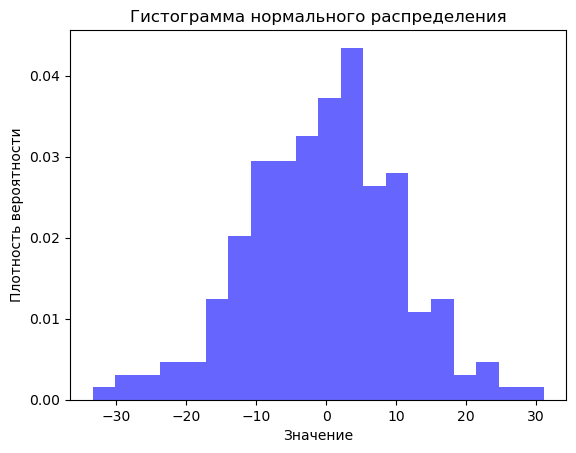

In [12]:
import matplotlib.pyplot as plt

mu = 0
sigma = 10  
num_samples = 200

random_numbers = torch.normal(mean=mu, std=sigma, size=(num_samples,))

plt.hist(random_numbers.numpy(), bins=20, density=True, alpha=0.6, color='b')

plt.title('Гистограмма нормального распределения')
plt.xlabel('Значение')
plt.ylabel('Плотность вероятности')

plt.show()
